# Root finding and optimization

## Introduction

In statistical applications, point estimation problems often boil down to maximize a function according to:

* maximize likelihood

* least squares

* maximum of a posterior distribution (i.e. bayesian)

When the function to be optimized is "smooth", we can reformulate optimization into a root finding problem.

**Trouble:** these problems often have no analytical solution.

## General setup

We will discuss 2 kinds of problems

* Root finding: solve $f(x) = 0$ for $x \in \mathbf{R}^d$, $d \geq 1$

* Optimization: maximize $g(x)$ for $x \in \mathbf{R}^d$, $d \geq 1$

We will address univariate and multivariate problems cases separately. We will look at methods that construct a sequence $\{ x_t : t \geq 0 \}$ designed to converge (as $t \xrightarrow{} \infty$) to the solution, denoted by $x^\star$.

### Theoretical considerations

* Under what conditions on $f$ (or $g$) and initial guess $x_0$ can we prove that $x_t \xrightarrow{} x^\star$?

* If $x_t \xrightarrow{} x^\star$, then how fast, i.e. what is its convergence order?

### Practical consideration

* How to write and implement the algorithm?

* Can't run the algorithm till $t = \infty$, so how to stop?

## Univariate problems

## Bisection (root-finding)

1. Find unique root $x^\star$ of $f$ in an interval $[a, b]$

* $f(a)f(b) \leq 0$ means a root exists between $a$ and $b$ (by the intermediate value theorem).

Pick an initial guess $x_0 = \frac{a + b}{2}$.

$x^\star$ must be in either $[ a, x_0 ]$ or $[ x_0, b ]$

Evaluate $f(x)$ at the end points to determine which one. The selected interval, call it $[a_1, b_1]$, is now just like the initial interval. Take $x_1 = \frac{a_1 + b_1}{2}$. Continue this process to construct a sequence $\{ x_t : t \geq 0 \}$.

### Algorithm

Assume $f(x)$ and the interval $[a, b]$ are given. 

1. Set $x = \frac{a+b}{2}$

2. If $f(a)f(b) \leq 0$, then $b=x$, else $a=x$.

3. If "converged", then stop; otherwise, return to step 1.

The convergence criteria is usually something like $| x_{new} - x_{old} | < \epsilon$ where $\epsilon$ is a specified small number (e.g. $\epsilon = 10^{-8}$).
A relative convergence riteria might be better $\frac{|x_{new} - x_{old}|}{x_{old}} < \epsilon$.

As a reminder, the limit of a sequence is defined by: $\forall \epsilon > 0, \ni N > 0$ s.t. $|U_N - l| < \epsilon$ where $N \xrightarrow{} \infty$ is the number of items in the sequence and $l$ is the value the sequence approaches.

**Theorem:** If $f$ is continuous, then $x_t \xrightarrow{} x^\star$. 

Time complexity: $\log n$

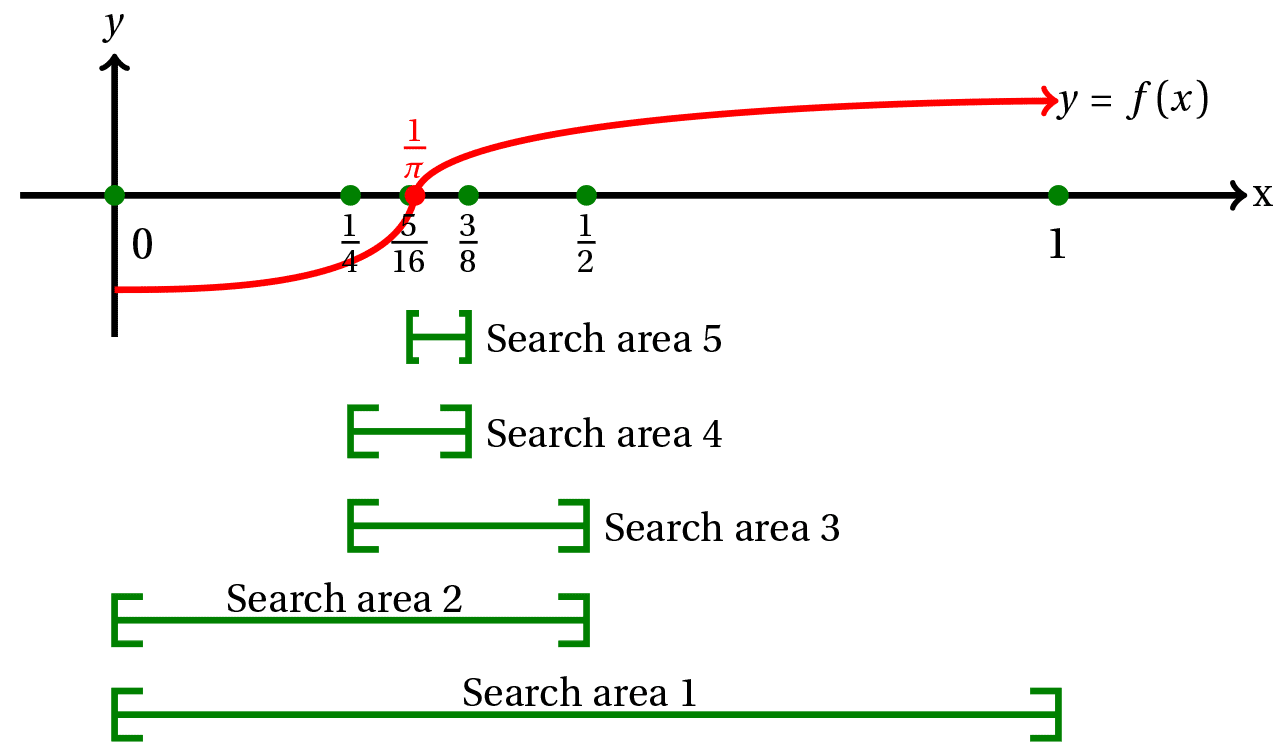

In [1]:
from utils import disp
disp('bisection_method.png')

## Newton's method (Newton-Raphson)

### Basic idea

Newton's method approximates a nonlinear function, which near its root by a linear function, can be solved by hand
It is based on Taylor's theorem, which gives the linear approximation of a function $f(x)$ in a neighborhood of some point $x_0$ as 

$$f(x) \approx f(x_0) + f^\prime(x_0) (x - x_0)$$

We can set this equal to 0 to solve for $x$

$$x = x_0 - \frac{f(x_0)}{f^\prime(x_0)}$$

### Algorithm - for root finding

Assume the function $f(x)$, its derivative $f^\prime(x)$, and an initial guess are given. 

* Set $t=0$

1. Calculate $x_{t+1} = x_t - \frac{f(x_t)}{f^\prime(x_t)}$

2. If the convergence criteria is met, then stop; otherwise, set $t \xleftarrow{} t+1$ and return to step 1.

### Warnings

Convergence depends on choice of $x_0$ and on $f$

Unlike bisection, Newton might not converge.


### Newton method theory

**Theorem**: If $f^{\prime\prime}$ is continuous and $x^\star$ is a root of $f$, with $f^\prime(x_0) \neq 0$, then there exists a neighborhood $N$ of $x^\star$ s.t. Newton's method converges to $x^\star$ for any $x_0 \in N$.

The proof uses taylor's approximation. Proof also shows that the convergence order is quadratic.

If Newton converges, then its way faster than bisection. But, added speed has a cost. It requires differentiability and the derivative $f^\prime$. Also, convergence is sensitive to choice of $x_0$.


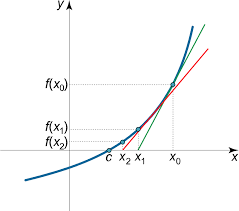

In [2]:
disp('newtons_method.png')

### Newton algorithm (for optimization)

In the context of unconstrained optimization, Newton's method can be used to find the optimum value. Apply the above method to find a root of $g^\prime(x) = 0$. The algorithm becomes 

Assume that the 1st derivative $g^\prime(x)$, its 2nd derivative $g^{\prime\prime}(x)$, and an initial guess $x_0$ are given. Set $t=0$,

i. Calculate $x_{t+1} = x_t - \frac{g^\prime(x_t)}{g^{\prime\prime}(x_t)}$

ii. If the convergence criteria is met, then stop; otherwise, set $t \xleftarrow{} t + 1$ and return to step i.

**Example:** Find $x^\star$ to maximize $g(x) = \frac{\log x}{1 + x}$, $x \in [1,5]$.

**a. Find root via bisection**



**b. Find root via newton's method**

ipykernel_launcher:5: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:5: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:41: RuntimeWarning: invalid value encountered in double_scalars


(0.9999990463256836, 0.999999999985196, nan)

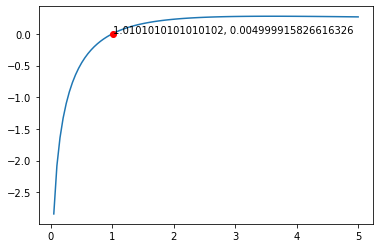

In [14]:
import numpy as np
from sympy import Symbol, diff

def f(x):
    return np.log(x) / (x + 1)

def fprime(x):
    return (1 + x - x * np.log(x)) / (x*(x + 1)**2)

def fprimeprime(x):
    return ( x * (x+1)**2 * (1+np.log(x)) - (1 + x - x * np.log(x)) * ( x*2*(x+1) + (x+1)**2 * x) ) / (x*(x+1)**3)

def bisection_method(f, a, b, epsilon):
    """
    Bisection method for root finding.
    """
    c = (a + b) / 2
    while abs(f(c)) > epsilon:
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        c = (a + b) / 2
    return c

def newtons_method(f, x0, epsilon):
    """
    Newton's method for root finding.
    """
    x = x0
    while abs(f(x)) > epsilon:
        x = x - f(x) / fprime(x)
    return x

def secant_method(f, x0, x1, epsilon):
    """
    Secant method for root finding.
    """
    x = x0
    while abs(f(x)) > epsilon:
        x = x - f(x) * (x - x1) / (f(x) - f(x1))
        x1 = x
    return x

xx = np.linspace(0, 5, 100)
import matplotlib.pyplot as plt
plt.plot(xx, f(xx))
first_pass_idx = np.where(f(xx) > 0)[0][0]
plt.plot(xx[first_pass_idx], f(xx[first_pass_idx]), 'ro')
plt.annotate(f"{xx[first_pass_idx]}, {f(xx[first_pass_idx])}", (xx[first_pass_idx], f(xx[first_pass_idx])))

b = bisection_method(f, 0, 5, 1e-6)
n = newtons_method(f, 0.5, 1e-6)
s = secant_method(f, 0.5, 5, 1e-6)
b, n, s


## Secant method

### Basic idea

Newton's method requires a formula for $f^\prime(x)$. To avoid this, approximate $f^\prime(x)$ at $x_0$ by a difference ratio. That is, recall from calculus that 
$$f^\prime(x) \approx \frac{f(x+h) - f(x)}{h}$$
where $h$ is small and positive.

This can also be expressed as
$$f^\prime(x) \approx \frac{f(x) - f(x_0)}{x - x_0}$$

The secant method follows Newton's method except we substitute a differenceratio for $f^\prime(x)$. Name is because the linear approximaiton is a secant not a tangent.

### Algorithm

Suppose $f(x)$ and 2 initial guesses $x_0$ and $x_1$ are given. Set $t=1$.

i. Calculate $x_{t+1} = x_t - \frac{f(x_t)}{\frac{f(x_t) - f(x_{t-1})}{x_t - x_{t-1}}}$

i.e. $x_{t+1} = x_t - f(x_t) \frac{x_t - x_{t-1}}{f(x_t) - f(x_{t-1})}$

If the convergence criteria are satisfied, then stop. Else, set $t\xleftarrow{} t+1$ and return to step i.